<a href="https://colab.research.google.com/github/NattanunSunawin/Pandas_HW1/blob/master/Pandas_6030807821.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas

##Import library Pandas


In [1]:
import pandas as pd

##Download Fire forest data from Google Drive
**NEED authentication from google drive**

In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Data from google drive
file_id = '1UjybN0jvmGAmirZhhRWojhla-8bke9nK' #copy from link
downloaded = drive.CreateFile({'id': file_id})

In [3]:
# Download the file to a local disk as 'Fire_Data.xlsx'.
downloaded.GetContentFile('Fire_Data.xlsx')

In [4]:
# Read file to program
fromGDrive = pd.read_excel('Fire_Data.xlsx')

##Select and modify data
ประกอบไปด้วย 3 ขั้นตอนดังนี้
* แสดงผลข้อมูลดิบที่ได้มา
* แปลงข้อมูลให้เป็น format 'DATETIME'
* สร้างตารางข้อมูลที่จะนำไปพลอท

### Display raw data

In [5]:
raw_fromGDrive = fromGDrive
raw_fromGDrive

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


### Modify data to DATETIME format
เมื่อเสร็จขั้นตอนนี้ตารางจะมี column DATETIME เพิ่มขึ้นมา 

In [6]:
#Select and display date
date = fromGDrive['ACQ_DATE']
date

0       2019-12-01
1       2019-12-01
2       2019-12-01
3       2019-12-01
4       2019-12-01
           ...    
79229   2020-04-04
79230   2020-04-04
79231   2020-04-04
79232   2020-04-04
79233   2020-04-04
Name: ACQ_DATE, Length: 79234, dtype: datetime64[ns]

In [7]:
#Select and display time
time = fromGDrive['ACQ_TIME']
hour = time//100
minute = time%100
time_frame = pd.DataFrame({'hour':hour, 'minute':minute})
time_frame

,hour,minute
0,6,35
1,6,35
2,6,35
3,6,35
4,6,35
...,...,...
79229,20,3
79230,20,3
79231,20,3
79232,20,3


In [8]:
#Create new dataframe
df = pd.DataFrame({'year':fromGDrive['ACQ_DATE'].dt.year, 'month':fromGDrive['ACQ_DATE'].dt.month, 'day':fromGDrive['ACQ_DATE'].dt.day, 'hour':hour, 'minute':minute})
df

,year,month,day,hour,minute
0,2019,12,1,6,35
1,2019,12,1,6,35
2,2019,12,1,6,35
3,2019,12,1,6,35
4,2019,12,1,6,35
...,...,...,...,...,...
79229,2020,4,4,20,3
79230,2020,4,4,20,3
79231,2020,4,4,20,3
79232,2020,4,4,20,3


In [9]:
#Create datetime
new_datetime = pd.to_datetime(df)
new_datetime

0       2019-12-01 06:35:00
1       2019-12-01 06:35:00
2       2019-12-01 06:35:00
3       2019-12-01 06:35:00
4       2019-12-01 06:35:00
                ...        
79229   2020-04-04 20:03:00
79230   2020-04-04 20:03:00
79231   2020-04-04 20:03:00
79232   2020-04-04 20:03:00
79233   2020-04-04 20:03:00
Length: 79234, dtype: datetime64[ns]

In [10]:
#Add DATETIME columns into main data
fromGDrive['DATETIME'] = new_datetime
fromGDrive

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DATETIME
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00


### Create plot dataframe

In [11]:
# Create new dataframe for plotting
plot_df = pd.DataFrame({'LATITUDE':fromGDrive['LATITUDE'], 'LONGITUDE':fromGDrive['LONGITUDE'], 'DATETIME':fromGDrive['DATETIME']})
# Make mask boolean : greater than the start date and smaller than the end date
start_date = '2019/12/01'
end_date = '2019/12/06'
mask = (plot_df['DATETIME'] > start_date) & (plot_df['DATETIME'] < end_date)
# Sort plot_df to 5 days
plot_df = plot_df.loc[mask]
plot_df


,LATITUDE,LONGITUDE,DATETIME
0,16.33696,98.70137,2019-12-01 06:35:00
1,16.48906,98.73961,2019-12-01 06:35:00
2,16.93571,99.06874,2019-12-01 06:35:00
3,16.54092,98.59869,2019-12-01 06:35:00
4,16.87473,98.63222,2019-12-01 06:35:00
...,...,...,...
395,18.52934,98.95547,2019-12-05 07:01:00
396,19.67583,100.26594,2019-12-05 07:01:00
397,19.52020,100.11665,2019-12-05 19:31:00
398,19.51522,100.11551,2019-12-05 19:31:00


##Plotting
ใช้ scatter plot แบบ 3D เพื่อแสดงตำแหน่งพิกัดของไฟป่าตั้งแต่วันที่ 2019-12-01 ถึง 2019-12-05

In [12]:
# Import library matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

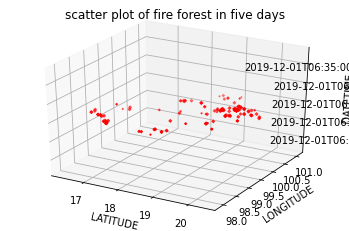

In [13]:
# Initialize variable for scatter plot
plt.ion()
x = plot_df['LATITUDE']
y = plot_df['LONGITUDE']
dates = plot_df['DATETIME']
dates_formatted = [pd.to_datetime(d) for d in dates]
z = [ (d-min(dates_formatted)).days for d in dates_formatted]

# Set title and label
fig = plt.figure('scatter plot of fire forest in five days')
ax = fig.add_subplot(111, projection='3d')
plt.title('scatter plot of fire forest in five days')
ax.set_xlabel('LATITUDE')
ax.set_ylabel('LONGITUDE')
ax.set_zlabel('DATETIME')

# Set z ticklabels to datetime
dt = [ pd.Timedelta(d) + min(dates_formatted)  for d in  ax.get_zticks()]
dtStr = [d.isoformat() for d in dt]
ax.set_zticklabels(dtStr);

# Plotting
plt.scatter(x, y, z,  c='r', marker='D');

# Display scatter plot
plt.show()